/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


(540, 2500) (540,)


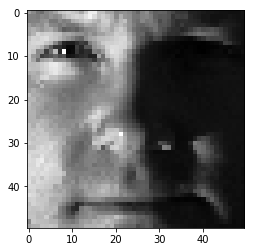

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


(100, 2500) (100,)


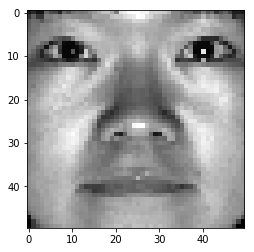

In [1]:
########question b#########
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
# print(train_labels)
print (train_data.shape, train_labels.shape)
plt.imshow(train_data[120, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

print (test_data.shape, test_labels.shape)
plt.imshow(test_data[40, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

59.25185185185185
(2500,)


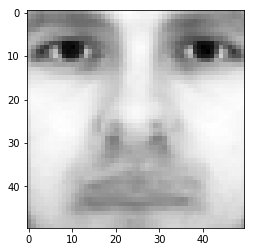

In [2]:
########question c########

avg_lst = []
for j in range(train_data.shape[1]):
    tot = 0
    for i in range(train_data.shape[0]):
        tot = tot + train_data[i,j] 
    avg = tot/len(train_data)    
    avg_lst.append(avg)
avg_face = np.array(avg_lst)  
print(avg_face[0])
print(avg_face.shape)
plt.imshow(avg_face.reshape(50,50), cmap = cm.Greys_r)
plt.show()    

[-54.25185185 -49.10185185 -45.42222222 ... -54.22222222 -44.61851852
 -28.27592593]


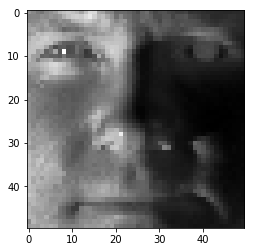

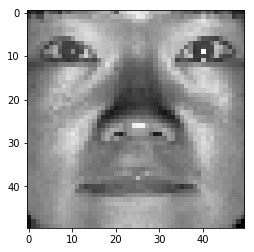

In [3]:
########question d##########

mean_sub = []
for i in range(train_data.shape[0]):
    sub = np.subtract(train_data[i,:], avg_face)
    sub_array = np.array(sub)
    mean_sub.append(sub_array)
result = np.array(mean_sub)    
print(result[0,:])
plt.imshow(result[120, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

mean_sub_tst = []
for i in range(test_data.shape[0]):
    sub_tst = np.subtract(test_data[i,:], avg_face)
    sub_array_tst = np.array(sub_tst)
    mean_sub_tst.append(sub_array_tst)
result_tst = np.array(mean_sub_tst)    
plt.imshow(result_tst[40, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()    


(540, 540)
(540,)
(2500, 2500)
[ 0.00777078  0.00535923  0.00500431 ... -0.02740647 -0.02601167
 -0.02387935]


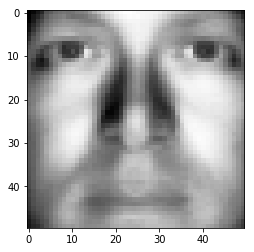

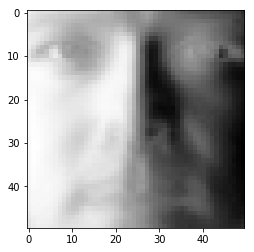

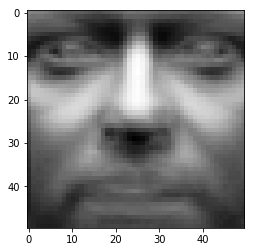

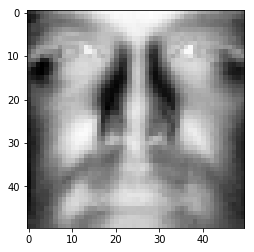

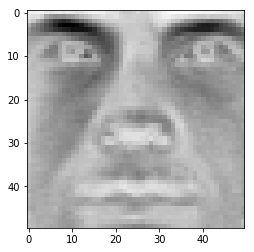

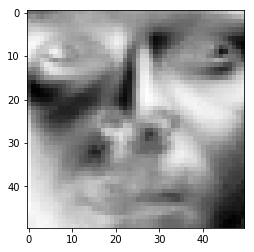

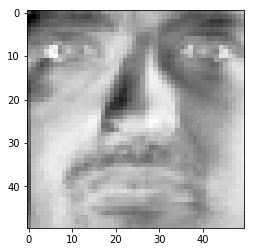

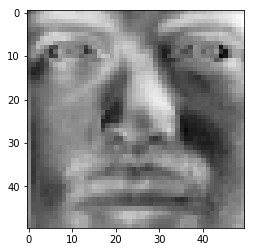

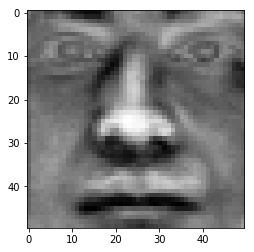

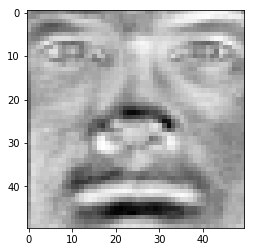

In [4]:
##########question e##########

from scipy.linalg import svd

U, sigma, VT = svd(result)
print(U.shape)
print(sigma.shape)
print(VT.shape)
print(VT[2,:])
for i in range(10):
    plt.imshow(VT[i, :].reshape(50,50), cmap = cm.Greys_r)
    plt.show()


In [77]:
########question f########

import math 

def approx_err(r):
    temp = 0 
    for p in range(train_data.shape[0]):
        for q in range(train_data.shape[1]):
            a = np.array(U[p,:r])
            b = np.array(sigma[:r])
            c = np.array(VT[:r,q])
            dot_prod = sum(a*b*c)
            diff = train_data[p,q] - dot_prod
            diff_sq = diff ** 2
            temp = temp + diff_sq
    error = math.sqrt(temp)   
    return error
   
for i in range(200):
    print(approx_err(i))


110233.55023766584
55646.83505526527
37866.39110901179
34046.179145678914
30600.807710736644
29284.221928839994
28176.6711934483
27177.657200450372
26234.670920278106
25380.90426659292
24707.20728842973
24065.575286677642
23470.806314548212
22925.688584595857
22426.519315776633
21934.473386681002
21513.239651526026
21118.22983119264
20733.90743628903
20369.28458688404
20021.21776636813
19672.182450061347
19336.377317731592
19036.52738576439
18743.48878567074
18461.202587036696
18176.432729102777
17903.09032473034
17640.116202827885
17386.113482436227
17146.08399704576
16917.56491944623
16691.97601642004
16484.863869429708
16279.12972068029
16079.663470568727
15882.48409842323
15696.41924602293
15517.573932351675
15344.91761990079
15172.202268501467
15002.496617081217
14841.607322207661
14684.4260718692
14532.132524655512
14382.0939927208
14231.783739476019
14088.25901009147
13944.19340503646
13807.45127604401
13671.59932419722
13539.45570694453
13407.524152078813
13279.013587098094
131

In [166]:
########question g########
            
def fmatrix(r):
    my_lst = [] 
    for p in range(train_data.shape[0]):
        lst = []
        for k in range(r):
            temp_x = np.array(result[p,:])
            temp_v = np.array(VT[k,:])
            dot_pd = np.dot(temp_x,temp_v)
            lst.append(dot_pd)
        my_lst.append(lst)          
    f = np.array(my_lst, dtype=int)   
        
    return f


def ftst_matrix(r):
    tst_lst = [] 
    for p in range(test_data.shape[0]):
        lst = []
        for k in range(r):
            temp_x = np.array(result_tst[p,:])
            temp_v = np.array(VT[k,:])
            dot_pd = np.dot(temp_x,temp_v)
            lst.append(dot_pd)  
        tst_lst.append(lst)    
    ftst = np.array(tst_lst, dtype = int)   
    
    return ftst





0.79


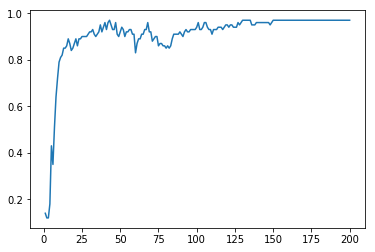

In [167]:
########question h##########

import sklearn as sk
from sklearn.linear_model import LogisticRegression

X = fmatrix(10)
y = train_labels

LR = LogisticRegression(random_state = 0, multi_class = 'ovr').fit(X,y)
RST = LR.score(ftst_matrix(10), test_labels)

print(RST)

score_lst = []
for i in range(1,201):
    X = fmatrix(i)
    y = train_labels
    LR = LogisticRegression(random_state = 0, multi_class = 'ovr').fit(X,y)
    my_result = LR.score(ftst_matrix(i), test_labels)
    score_lst.append(my_result)

r_lst = list(range(1,201))    
plt.plot(r_lst,score_lst)
  
    
    